# Operations

scmdata has limited support for operations with `ScmRun` instances. Here we provide examples of how to use them.

## Available operations

At present, the following options are available:

- add
- subtract
- divide
- multiply
- integrate
- change per unit time (numerical differentiation essentially)
- calculate linear regression
- shift median of an ensemble

These operations are unit aware so are fairly powerful.

## Load some data

We first load some test data.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback
import warnings

import numpy as np
import pandas as pd
from openscm_units import unit_registry

from scmdata import ScmRun, run_append

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 15)
pd.set_option("display.max_colwidth", 80)
pd.set_option("display.min_rows", 20)

In [3]:
# NBVAL_IGNORE_OUTPUT
db_emms = ScmRun("rcp26_emissions.csv", lowercase_cols=True)
db_emms.tail()

time                                                 1765-01-01 00:00:00  1766-01-01 00:00:00  1767-01-01 00:00:00  \
model region scenario unit          variable                                                                         
IMAGE World  RCP26    Mt NMVOC / yr Emissions|NMVOC                  0.0             1.596875             2.292316   
                      Mt N / yr     Emissions|NOx                    0.0             0.109502             0.168038   
                      Mt OC / yr    Emissions|OC                     0.0             0.565920             0.781468   
                      kt SF6 / yr   Emissions|SF6                    0.0             0.000000             0.000000   
                      Mt S / yr     Emissions|SOx                    0.0             0.098883             0.116306   

time                                                 1768-01-01 00:00:00  1769-01-01 00:00:00  1770-01-01 00:00:00  \
model region scenario unit          variable                                                                         
IMAGE World  RCP26    Mt NMVOC / yr Emissions|NMVOC             2.988648             3.685897             4.384091   
                      Mt N / yr     Emissions|NOx               0.226625             0.285264             0.343956   
                      Mt OC / yr    Emissions|OC                0.997361             1.213611             1.430229   
                      kt SF6 / yr   Emissions|SF6               0.000000             0.000000             0.000000   
                      Mt S / yr     Emissions|SOx               0.133811             0.151398             0.169070   

time                                                 1771-01-01 00:00:00  ...  2494-01-01 00:00:00  \
model region scenario unit          variable                              ...                        
IMAGE World  RCP26    Mt NMVOC / yr Emissions|NMVOC             5.083260  ...             125.5104   
                      Mt N / yr     Emissions|NOx               0.402704  ...              15.9895   
                      Mt OC / yr    Emissions|OC                1.647226  ...              25.3311   
                      kt SF6 / yr   Emissions|SF6               0.000000  ...               0.0442   
                      Mt S / yr     Emissions|SOx               0.186831  ...               6.4552   

time                                                 2495-01-01 00:00:00  2496-01-01 00:00:00  2497-01-01 00:00:00  \
model region scenario unit          variable                                                                         
IMAGE World  RCP26    Mt NMVOC / yr Emissions|NMVOC             125.5104             125.5104             125.5104   
                      Mt N / yr     Emissions|NOx                15.9895              15.9895              15.9895   
                      Mt OC / yr    Emissions|OC                 25.3311              25.3311              25.3311   
                      kt SF6 / yr   Emissions|SF6                 0.0442               0.0442               0.0442   
                      Mt S / yr     Emissions|SOx                 6.4552               6.4552               6.4552   

time                                                 2498-01-01 00:00:00  2499-01-01 00:00:00  2500-01-01 00:00:00  
model region scenario unit          variable                                                                        
IMAGE World  RCP26    Mt NMVOC / yr Emissions|NMVOC             125.5104             125.5104             125.5104  
                      Mt N / yr     Emissions|NOx                15.9895              15.9895              15.9895  
                      Mt OC / yr    Emissions|OC                 25.3311              25.3311              25.3311  
                      kt SF6 / yr   Emissions|SF6                 0.0442               0.0442               0.0442  
                      Mt S / yr     Emissions|SOx                 6.4552               6.4552         

In [4]:
db_forcing = ScmRun(
    "rcmip-radiative-forcing-annual-means-v4-0-0.csv", lowercase_cols=True
).drop_meta(["mip_era", "activity_id"], inplace=False)

db_forcing.head()

time                                                                                                  1750-01-01 00:00:00  \
model region scenario unit  variable                                                                                        
AIM   World  rcp60    W/m^2 Radiative Forcing                                                                         NaN   
                            Radiative Forcing|Anthropogenic                                                           NaN   
                            Radiative Forcing|Anthropogenic|Aerosols                                                  NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions                      NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions                  NaN   

time                                                                                                  1751-01-01 00:00:00  \
model region scenario unit  variable                                                                                        
AIM   World  rcp60    W/m^2 Radiative Forcing                                                                         NaN   
                            Radiative Forcing|Anthropogenic                                                           NaN   
                            Radiative Forcing|Anthropogenic|Aerosols                                                  NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions                      NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions                  NaN   

time                                                                                                  1752-01-01 00:00:00  \
model region scenario unit  variable                                                                                        
AIM   World  rcp60    W/m^2 Radiative Forcing                                                                         NaN   
                            Radiative Forcing|Anthropogenic                                                           NaN   
                            Radiative Forcing|Anthropogenic|Aerosols                                                  NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions                      NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions                  NaN   

time                                                                                                  1753-01-01 00:00:00  \
model region scenario unit  variable                                                                                        
AIM   World  rcp60    W/m^2 Radiative Forcing                                                                         NaN   
                            Radiative Forcing|Anthropogenic                                                           NaN   
                            Radiative Forcing|Anthropogenic|Aerosols                                                  NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions                      NaN   
                            Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions                  NaN   

time                                                                                                  1754-01-01 00:00:00  \
model region scenario unit  variable                                                                                        
AIM   World  rcp60    W/m^2 Radiative Forcing                                                                         NaN   
                            Radiative Forcing|Anthropogenic                                                           NaN

## Add

A very simple example is adding two variables together. For example, below we calculate total CO$_2$ emissions for the RCP2.6 scenario. 

In [5]:
emms_co2 = db_emms.filter(
    variable="Emissions|CO2|MAGICC Fossil and Industrial"
).add(
    db_emms.filter(variable="Emissions|CO2|MAGICC AFOLU"),
    op_cols={"variable": "Emissions|CO2"},
)
emms_co2.head()

,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,...,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,region,scenario,unit,variable,,,,,,,,,,,,,,,
IMAGE,World,RCP26,C * gigametric_ton / a,Emissions|CO2,0.003,0.008338,0.013677,0.019015,0.024353,0.029691,0.03603,...,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308


<AxesSubplot:xlabel='time', ylabel='value'>

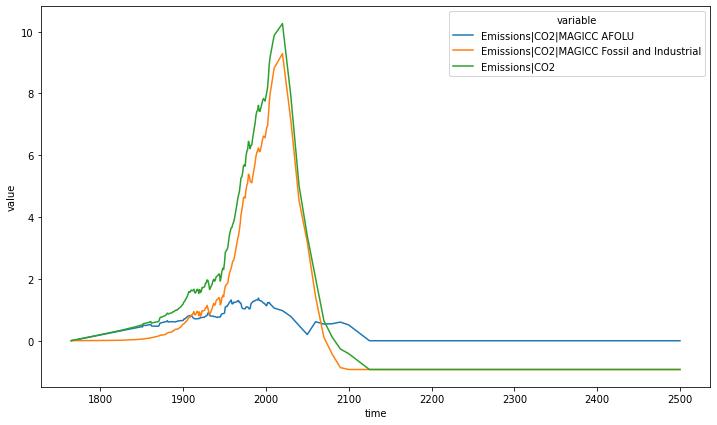

In [6]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
plt_df = run_append([db_emms, emms_co2])
plt_df.filter(variable="*CO2*").lineplot(hue="variable", ax=ax)

The `op_cols` argument tells scmdata which columns to ignore when aligning the data and what value to give this column in the output. So we could do the same calculation but give the output a different name as shown below.

In [7]:
emms_co2_different_name = db_emms.filter(
    variable="Emissions|CO2|MAGICC Fossil and Industrial"
).add(
    db_emms.filter(variable="Emissions|CO2|MAGICC AFOLU"),
    op_cols={"variable": "Emissions|CO2|Total"},
)
emms_co2_different_name.head()

,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,...,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,region,scenario,unit,variable,,,,,,,,,,,,,,,
IMAGE,World,RCP26,C * gigametric_ton / a,Emissions|CO2|Total,0.003,0.008338,0.013677,0.019015,0.024353,0.029691,0.03603,...,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308


## Subtract

Subtraction works much the same way. Below we calculate the total effective radiative forcing and CO$_2$ effective radiative forcing in the [RCMIP](rcmip.org) data.

In [8]:
non_co2_rf = db_forcing.filter(
    variable="Effective Radiative Forcing"
).subtract(
    db_forcing.filter(
        variable="Effective Radiative Forcing|Anthropogenic|CO2"
    ),
    op_cols={"variable": "Effective Radiative Forcing|Non-CO2"},
)
non_co2_rf.head()

time                                                                                            1750-01-01 00:00:00  \
model   region scenario                  unit              variable                                                   
AIM/CGE World  ssp370                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.259367   
               ssp370-lowNTCF-aerchemmip watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.259367   
               ssp370-lowNTCF-gidden     watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.259367   
GCAM4   World  ssp434                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.259367   
               ssp460                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.259367   

time                                                                                            1751-01-01 00:00:00  \
model   region scenario                  unit              variable                                                   
AIM/CGE World  ssp370                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.241965   
               ssp370-lowNTCF-aerchemmip watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.241965   
               ssp370-lowNTCF-gidden     watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.241965   
GCAM4   World  ssp434                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.241965   
               ssp460                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.241965   

time                                                                                            1752-01-01 00:00:00  \
model   region scenario                  unit              variable                                                   
AIM/CGE World  ssp370                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.213009   
               ssp370-lowNTCF-aerchemmip watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.213009   
               ssp370-lowNTCF-gidden     watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.213009   
GCAM4   World  ssp434                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.213009   
               ssp460                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.213009   

time                                                                                            1753-01-01 00:00:00  \
model   region scenario                  unit              variable                                                   
AIM/CGE World  ssp370                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.177158   
               ssp370-lowNTCF-aerchemmip watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.177158   
               ssp370-lowNTCF-gidden     watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.177158   
GCAM4   World  ssp434                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.177158   
               ssp460                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.177158   

time                                                                                            1754-01-01 00:00:00  \
model   region scenario                  unit              variable                                                   
AIM/CGE World  ssp370                    watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.142201   
               ssp370-lowNTCF-aerchemmip watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.142201   
               ssp370-lowNTCF-gidden     watt / meter ** 2 Effective Radiative Forcing|Non-CO2             0.142201   
GCAM4   World  ssp434                    watt / meter ** 2 Effective 

<AxesSubplot:xlabel='time', ylabel='value'>

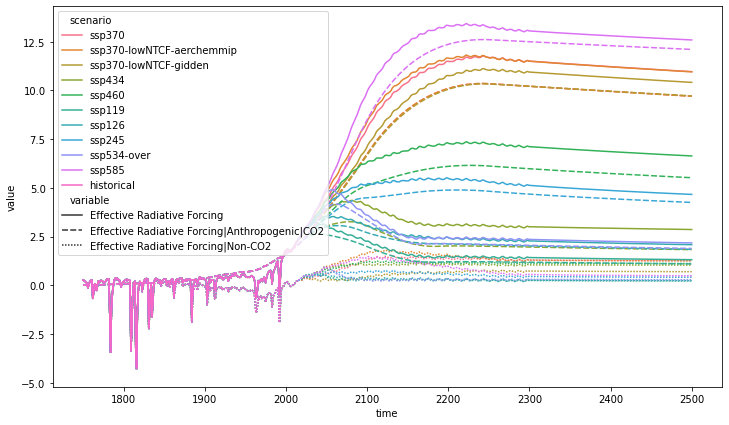

In [9]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
plt_df_forcing = run_append([db_forcing, non_co2_rf])
plt_df_forcing.filter(
    variable=["Effective Radiative Forcing", "Effective*CO2*"]
).lineplot(style="variable")

We could also calculate the difference between some SSP and RCP scenarios. The first thing to try would be to simply subtract the SSP126 total effective radiative forcing from the RCP26 total radiative forcing.

In [10]:
try:
    ssp126_minus_rcp26 = db_forcing.filter(
        scenario="ssp126", variable="Effective Radiative Forcing"
    ).subtract(
        db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
        op_cols={"scenario": "ssp126 - rcp26",},
    )
except KeyError:
    traceback.print_exc(limit=0, chain=False)

Traceback (most recent call last):
KeyError: "No equivalent in `other` for [('model', 'IMAGE'), ('region', 'World'), ('variable', 'Effective Radiative Forcing')]"


Doing this gives us a `KeyError`. The reason is that the SSP126 variable is `Effective Radiative Forcing` whilst the RCP26 variable is `Radiative Forcing` hence the two datasets don't align. We can work around this using the `op_cols` argument.

<AxesSubplot:xlabel='time', ylabel='watt / meter ** 2'>

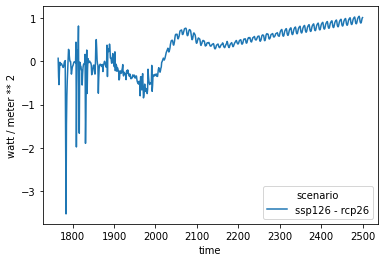

In [11]:
# NBVAL_IGNORE_OUTPUT
ssp126_minus_rcp26 = db_forcing.filter(
    scenario="ssp126", variable="Effective Radiative Forcing"
).subtract(
    db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
    op_cols={"scenario": "ssp126 - rcp26", "variable": "RF",},
)
ssp126_minus_rcp26.lineplot()

We could create plots of all the differences as shown below.

In [12]:
ssp_rcp_diffs = []
for target in ["26", "45", "60", "85"]:
    ssp = db_forcing.filter(
        scenario="ssp*{}".format(target),
        variable="Effective Radiative Forcing",
    )
    ssp_scen = ssp.get_unique_meta("scenario", no_duplicates=True)
    ssp_model = ssp.get_unique_meta("model", no_duplicates=True)

    rcp = db_forcing.filter(
        scenario="rcp{}".format(target), variable="Radiative Forcing"
    )
    rcp_scen = rcp.get_unique_meta("scenario", no_duplicates=True)
    rcp_model = rcp.get_unique_meta("model", no_duplicates=True)

    ssp_rcp_diff = ssp.subtract(
        rcp,
        op_cols={
            "scenario": "{} - {}".format(ssp_scen, rcp_scen),
            "model": "{} - {}".format(ssp_model, rcp_model),
            "variable": "RF",
        },
    )
    ssp_rcp_diffs.append(ssp_rcp_diff)

ssp_rcp_diffs = run_append(ssp_rcp_diffs)
ssp_rcp_diffs.head()

,,,,time,1750-01-01 00:00:00,1751-01-01 00:00:00,1752-01-01 00:00:00,1753-01-01 00:00:00,1754-01-01 00:00:00,1755-01-01 00:00:00,1756-01-01 00:00:00,...,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,region,scenario,unit,variable,,,,,,,,,,,,,,,
IMAGE - IMAGE,World,ssp126 - rcp26,watt / meter ** 2,RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.927014,0.894074,0.886604,0.904720,0.950169,0.995562,1.012583
MESSAGE-GLOBIOM - MiniCAM,World,ssp245 - rcp45,watt / meter ** 2,RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454487,0.452659,0.450835,0.449006,0.447191,0.445375,0.444465
GCAM4 - AIM,World,ssp460 - rcp60,watt / meter ** 2,RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.650594,0.648503,0.646411,0.644319,0.642235,0.640155,0.639114
REMIND-MAGPIE - MESSAGE,World,ssp585 - rcp85,watt / meter ** 2,RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.260144,0.258118,0.256072,0.254027,0.252006,0.250012,0.248969


<AxesSubplot:xlabel='time', ylabel='watt / meter ** 2'>

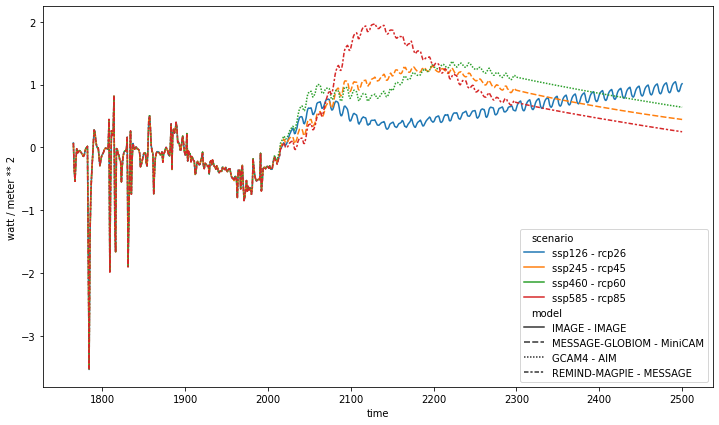

In [13]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
ssp_rcp_diffs.lineplot(ax=ax, style="model")

## Divide

The divide (and multiply) operations clearly have to also be aware of units. Thanks to [Pint's pandas interface](https://pint.readthedocs.io/en/0.13/pint-pandas.html), this can happen automatically. For example, in our calculation below the units are automatically returned as `dimensionless`.

In [14]:
ssp126_to_rcp26 = db_forcing.filter(
    scenario="ssp126", variable="Effective Radiative Forcing"
).divide(
    db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
    op_cols={"scenario": "ssp126 / rcp26", "variable": "RF",},
)
ssp126_to_rcp26.head()

,,,,time,1750-01-01 00:00:00,1751-01-01 00:00:00,1752-01-01 00:00:00,1753-01-01 00:00:00,1754-01-01 00:00:00,1755-01-01 00:00:00,1756-01-01 00:00:00,...,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,region,scenario,unit,variable,,,,,,,,,,,,,,,
IMAGE,World,ssp126 / rcp26,dimensionless,RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.802047,1.752583,1.742102,1.769413,1.841106,1.918814,1.949772


<AxesSubplot:xlabel='time', ylabel='dimensionless'>

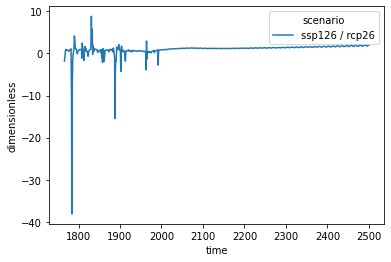

In [15]:
# NBVAL_IGNORE_OUTPUT
ssp126_to_rcp26.lineplot()

## Integrate

We can also integrate our data. As previously, thanks to [Pint](https://pint.readthedocs.io/en/0.13) and some other work, this operation is also unit aware.

There are two methods of integration available, `trapz` and `sum`. The method that should be used depends on the data you are integrating, specifically whether the data are piecewise linear or piecewise constant. Annual timeseries of emissions are piecewise constant (they represent a single value over an interval) so should therefore use the `sum` method. Other output such as Effective Radiative Forcing, Concentrations or decadal timeseries of Emissions, represent an single point estimate or an average over a period. These timeseries are therefore piecewise linear and should use the `trapz` method.

In [16]:
with warnings.catch_warnings():
    # Ignore warning about nans in the historical timeseries
    warnings.filterwarnings("ignore", module="scmdata.ops")

    erf_integral = (
        db_forcing.filter(variable="Effective Radiative Forcing")
        .integrate()
        .convert_unit("TJ / m^2")
    )

erf_integral

<ScmRun (timeseries: 11, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	              model region                   scenario      unit                                variable
	0           AIM/CGE  World                     ssp370  TJ / m^2  Cumulative Effective Radiative Forcing
	1           AIM/CGE  World  ssp370-lowNTCF-aerchemmip  TJ / m^2  Cumulative Effective Radiative Forcing
	2           AIM/CGE  World      ssp370-lowNTCF-gidden  TJ / m^2  Cumulative Effective Radiative Forcing
	3             GCAM4  World                     ssp434  TJ / m^2  Cumulative Effective Radiative Forcing
	4             GCAM4  World                     ssp460  TJ / m^2  Cumulative Effective Radiative Forcing
	5             IMAGE  World                     ssp119  TJ / m^2  Cumulative Effective Radiative Forcing
	6             IMAGE  World                     ssp126  TJ / m^2  Cumulative Effective Radiative Forcing
	7   MESSAGE-GLOBIOM  World                     ssp

## Time deltas

We can also calculate the change per unit time of our data. As previously, thanks to [Pint](https://pint.readthedocs.io/en/0.13) and some other work, this operation is also unit aware.

In [17]:
with warnings.catch_warnings():
    # Ignore warning about nans in the historical timeseries
    warnings.filterwarnings("ignore", module="scmdata.ops")

    erf_delta = (
        db_forcing.filter(variable="Effective Radiative Forcing")
        .delta_per_delta_time()
        .convert_unit("W / m^2 / yr")
    )

erf_delta

<ScmRun (timeseries: 11, timepoints: 750)>
Time:
	Start: 1750-07-02T12:00:00
	End: 2499-07-02T12:00:00
Meta:
	              model region                   scenario          unit                           variable
	0           AIM/CGE  World                     ssp370  W / m^2 / yr  Delta Effective Radiative Forcing
	1           AIM/CGE  World  ssp370-lowNTCF-aerchemmip  W / m^2 / yr  Delta Effective Radiative Forcing
	2           AIM/CGE  World      ssp370-lowNTCF-gidden  W / m^2 / yr  Delta Effective Radiative Forcing
	3             GCAM4  World                     ssp434  W / m^2 / yr  Delta Effective Radiative Forcing
	4             GCAM4  World                     ssp460  W / m^2 / yr  Delta Effective Radiative Forcing
	5             IMAGE  World                     ssp119  W / m^2 / yr  Delta Effective Radiative Forcing
	6             IMAGE  World                     ssp126  W / m^2 / yr  Delta Effective Radiative Forcing
	7   MESSAGE-GLOBIOM  World                     ssp245  W /

(-0.1, 0.2)

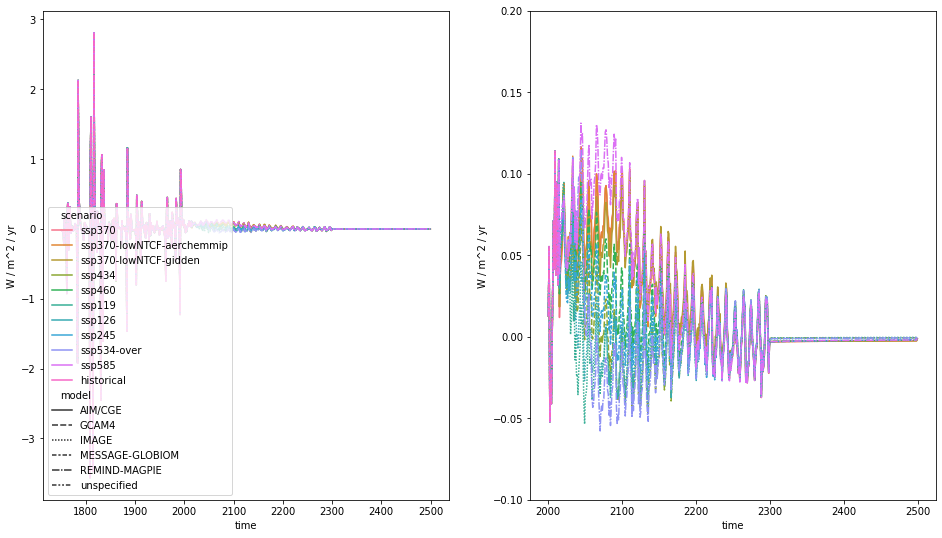

In [18]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(16, 9), ncols=2)
erf_delta.lineplot(ax=axes[0], style="model")
erf_delta.filter(year=range(2000, 2500)).lineplot(
    ax=axes[1], style="model", legend=False
)
axes[1].set_ylim([-0.1, 0.2])

## Regression

We can also calculate linear regressions of our data. As previously, thanks to [Pint](https://pint.readthedocs.io/en/0.13) and some other work, this operation is also unit aware.

In [19]:
erf_total = db_forcing.filter(variable="Effective Radiative Forcing").filter(
    scenario="historical", keep=False
)
erf_total_for_reg = erf_total.filter(year=range(2010, 2050))

The default return type of `linear_regression` is a list of dictionaries.

In [20]:
linear_regression_raw = erf_total_for_reg.linear_regression()
type(linear_regression_raw)

list

In [21]:
type(linear_regression_raw[0])

dict

If we want, we can make a `DataFrame` from this list.

In [22]:
# NBVAL_IGNORE_OUTPUT
linear_regression_df = pd.DataFrame(linear_regression_raw)
linear_regression_df

,model,region,scenario,variable,gradient,intercept
0,AIM/CGE,World,ssp370,Effective Radiative Forcing,1.90373454366716e-09 watt / meter ** 2 / second,-0.42795992093158064 watt / meter ** 2
1,AIM/CGE,World,ssp370-lowNTCF-aerchemmip,Effective Radiative Forcing,2.196587535316519e-09 watt / meter ** 2 / second,-0.8448632244177651 watt / meter ** 2
2,AIM/CGE,World,ssp370-lowNTCF-gidden,Effective Radiative Forcing,1.599468808895454e-09 watt / meter ** 2 / second,0.05747355601293781 watt / meter ** 2
3,GCAM4,World,ssp434,Effective Radiative Forcing,1.513761825121089e-09 watt / meter ** 2 / second,0.21738181303589565 watt / meter ** 2
4,GCAM4,World,ssp460,Effective Radiative Forcing,1.8242980920680466e-09 watt / meter ** 2 / second,-0.28043219892423493 watt / meter ** 2
5,IMAGE,World,ssp119,Effective Radiative Forcing,8.935038882642927e-10 watt / meter ** 2 / second,1.2017704356912693 watt / meter ** 2
6,IMAGE,World,ssp126,Effective Radiative Forcing,1.2279126589716315e-09 watt / meter ** 2 / second,0.6544862441567445 watt / meter ** 2
7,MESSAGE-GLOBIOM,World,ssp245,Effective Radiative Forcing,1.6273999739537489e-09 watt / meter ** 2 / second,0.03399120647873119 watt / meter ** 2
8,REMIND-MAGPIE,World,ssp534-over,Effective Radiative Forcing,2.270391125202227e-09 watt / meter ** 2 / second,-0.9204663925813407 watt / meter ** 2
9,REMIND-MAGPIE,World,ssp585,Effective Radiative Forcing,2.2626366011973838e-09 watt / meter ** 2 / second,-0.9168810372684146 watt / meter ** 2


Alternately, we can request only the gradients or only the intercepts (noting that intercepts are calculated using a time base which has zero at 1970-01-01 again).

In [23]:
erf_total_for_reg.linear_regression_gradient("W / m^2 / yr")

,model,region,scenario,variable,gradient,unit
0,AIM/CGE,World,ssp370,Effective Radiative Forcing,0.060077,W / m^2 / yr
1,AIM/CGE,World,ssp370-lowNTCF-aerchemmip,Effective Radiative Forcing,0.069319,W / m^2 / yr
2,AIM/CGE,World,ssp370-lowNTCF-gidden,Effective Radiative Forcing,0.050475,W / m^2 / yr
3,GCAM4,World,ssp434,Effective Radiative Forcing,0.047771,W / m^2 / yr
4,GCAM4,World,ssp460,Effective Radiative Forcing,0.057570,W / m^2 / yr
5,IMAGE,World,ssp119,Effective Radiative Forcing,0.028197,W / m^2 / yr
6,IMAGE,World,ssp126,Effective Radiative Forcing,0.038750,W / m^2 / yr
7,MESSAGE-GLOBIOM,World,ssp245,Effective Radiative Forcing,0.051357,W / m^2 / yr
8,REMIND-MAGPIE,World,ssp534-over,Effective Radiative Forcing,0.071648,W / m^2 / yr
9,REMIND-MAGPIE,World,ssp585,Effective Radiative Forcing,0.071403,W / m^2 / yr


In [24]:
erf_total_for_reg.linear_regression_intercept("W / m^2")

,model,region,scenario,variable,intercept,unit
0,AIM/CGE,World,ssp370,Effective Radiative Forcing,-0.427960,W / m^2
1,AIM/CGE,World,ssp370-lowNTCF-aerchemmip,Effective Radiative Forcing,-0.844863,W / m^2
2,AIM/CGE,World,ssp370-lowNTCF-gidden,Effective Radiative Forcing,0.057474,W / m^2
3,GCAM4,World,ssp434,Effective Radiative Forcing,0.217382,W / m^2
4,GCAM4,World,ssp460,Effective Radiative Forcing,-0.280432,W / m^2
5,IMAGE,World,ssp119,Effective Radiative Forcing,1.201770,W / m^2
6,IMAGE,World,ssp126,Effective Radiative Forcing,0.654486,W / m^2
7,MESSAGE-GLOBIOM,World,ssp245,Effective Radiative Forcing,0.033991,W / m^2
8,REMIND-MAGPIE,World,ssp534-over,Effective Radiative Forcing,-0.920466,W / m^2
9,REMIND-MAGPIE,World,ssp585,Effective Radiative Forcing,-0.916881,W / m^2


If we want to plot the regressions, we can request an `ScmRun` instance based on the linear regressions is returned using the `linear_regression_scmrun` method.

In [25]:
linear_regression = erf_total_for_reg.linear_regression_scmrun()
linear_regression["label"] = "linear regression"
linear_regression

<ScmRun (timeseries: 10, timepoints: 40)>
Time:
	Start: 2010-01-01T00:00:00
	End: 2049-01-01T00:00:00
Meta:
	               label            model region                   scenario   unit                     variable
	0  linear regression          AIM/CGE  World                     ssp370  W/m^2  Effective Radiative Forcing
	1  linear regression          AIM/CGE  World  ssp370-lowNTCF-aerchemmip  W/m^2  Effective Radiative Forcing
	2  linear regression          AIM/CGE  World      ssp370-lowNTCF-gidden  W/m^2  Effective Radiative Forcing
	3  linear regression            GCAM4  World                     ssp434  W/m^2  Effective Radiative Forcing
	4  linear regression            GCAM4  World                     ssp460  W/m^2  Effective Radiative Forcing
	5  linear regression            IMAGE  World                     ssp119  W/m^2  Effective Radiative Forcing
	6  linear regression            IMAGE  World                     ssp126  W/m^2  Effective Radiative Forcing
	7  linear regressio

In [26]:
erf_total_for_reg["label"] = "Raw"
pdf = run_append([erf_total_for_reg, linear_regression])

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

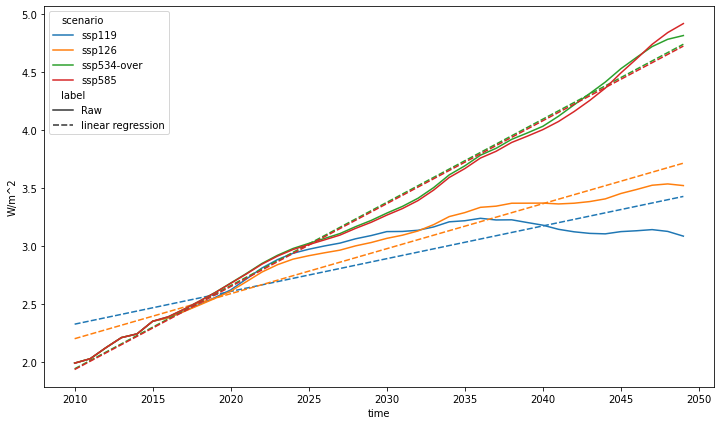

In [27]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(12, 7))
pdf.filter(scenario=["ssp1*", "ssp5*"]).lineplot(ax=axes, style="label")

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

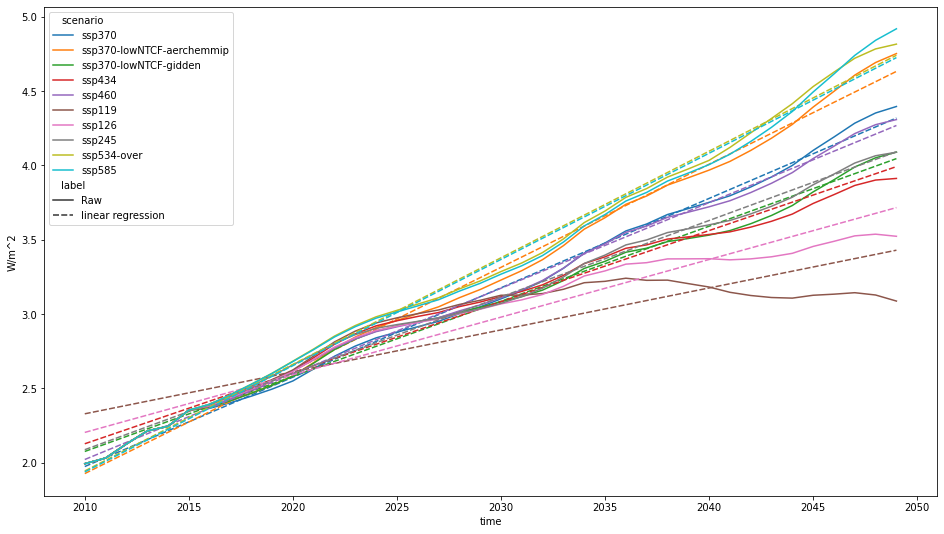

In [28]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(16, 9))
pdf.lineplot(ax=axes, style="label")

## Shift median

Sometimes we wish to simply move an ensemble of timeseries so that its median matches some value, whilst preserving the spread of the ensemble. This can be done with the `adjust_median_to_target` method. For example, let's say that we wanted to shift our ensemble of forcing values so that their 2030 median was equal to 4.5 (god knows why we would want to do this, but it will serve as an example).

In [29]:
erf_total = db_forcing.filter(variable="Effective Radiative Forcing").filter(
    scenario="historical", keep=False
)
erf_total_for_shift = erf_total.filter(year=range(2010, 2100))
erf_total_for_shift["label"] = "Raw"

In [30]:
erf_total_for_shift

<ScmRun (timeseries: 10, timepoints: 90)>
Time:
	Start: 2010-01-01T00:00:00
	End: 2099-01-01T00:00:00
Meta:
	    label            model region                   scenario   unit                     variable
	58    Raw          AIM/CGE  World                     ssp370  W/m^2  Effective Radiative Forcing
	77    Raw          AIM/CGE  World  ssp370-lowNTCF-aerchemmip  W/m^2  Effective Radiative Forcing
	96    Raw          AIM/CGE  World      ssp370-lowNTCF-gidden  W/m^2  Effective Radiative Forcing
	115   Raw            GCAM4  World                     ssp434  W/m^2  Effective Radiative Forcing
	134   Raw            GCAM4  World                     ssp460  W/m^2  Effective Radiative Forcing
	211   Raw            IMAGE  World                     ssp119  W/m^2  Effective Radiative Forcing
	230   Raw            IMAGE  World                     ssp126  W/m^2  Effective Radiative Forcing
	307   Raw  MESSAGE-GLOBIOM  World                     ssp245  W/m^2  Effective Radiative Forcing
	384   Raw

In [31]:
erf_total_shifted = erf_total_for_shift.adjust_median_to_target(
    target=4.5, evaluation_period=2030, process_over=("scenario", "model"),
)
erf_total_shifted["label"] = "Shifted"

In [32]:
pdf = run_append([erf_total_for_shift, erf_total_shifted])

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

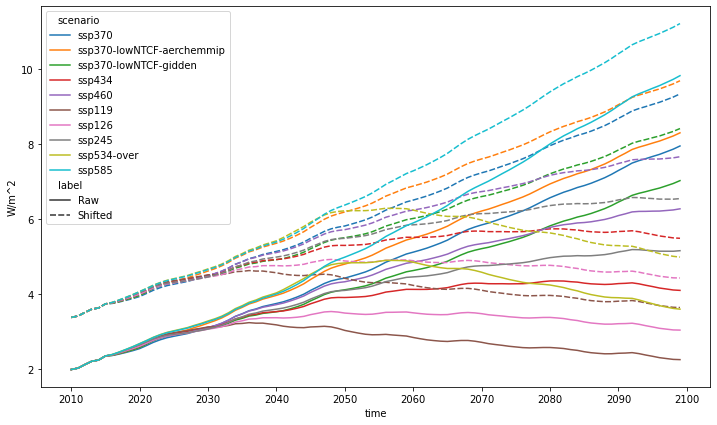

In [33]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(12, 7))
pdf.lineplot(ax=axes, style="label")

If we wanted, we could adjust the timeseries relative to some reference period first before doing the shift.

In [34]:
ref_period = range(2010, 2040 + 1)
erf_total_for_shift_rel_to_ref_period = erf_total_for_shift.relative_to_ref_period_mean(
    year=ref_period
)
erf_total_for_shift_rel_to_ref_period["label"] = "rel. to {} - {}".format(
    ref_period[0], ref_period[-1]
)

In [35]:
target = -5
evaluation_period = range(2020, 2030 + 1)
erf_total_for_shift_rel_to_ref_period_shifted = erf_total_for_shift_rel_to_ref_period.adjust_median_to_target(
    target=target,
    evaluation_period=evaluation_period,
    process_over=("scenario", "model"),
)
erf_total_for_shift_rel_to_ref_period_shifted[
    "label"
] = "rel. to {} - {} (median of {} - {} mean adjusted to {})".format(
    ref_period[0],
    ref_period[-1],
    evaluation_period[0],
    evaluation_period[-1],
    target,
)

In [36]:
pdf = run_append(
    [
        erf_total_for_shift,
        erf_total_shifted,
        erf_total_for_shift_rel_to_ref_period,
        erf_total_for_shift_rel_to_ref_period_shifted,
    ]
)

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

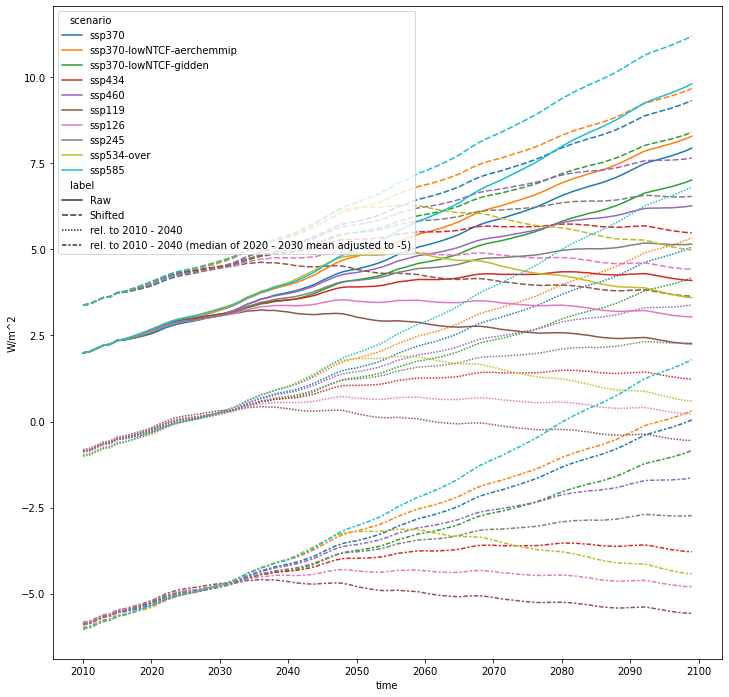

In [37]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(12, 12))
pdf.lineplot(ax=axes, style="label")